<a href="https://colab.research.google.com/github/sugarchins/ML-NLP-Projects/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

c)	Use the following Face Mask detection Dataset link and create an end-to-end project on Colab to predict whether person is wearing mask or not.

https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data

i.	Import the dataset in Colab and perform the EDA and do the visualizations.

ii.	Create model from scratch using your own number of filters, loss functions, no. of epochs and check the accuracy.

iii.	Now use the pretrained model to check if accuracy gets improved.

iv.	After that, go for data augmentation and further check if accuracy has improved.

v.	Compare the training and testing accuracy with all these 3 approaches and suggest the best model.



# Face Detection Model -CNN


**Chetna Mishra
(Batch 9)**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 77% 126M/163M [00:00<00:00, 1.32GB/s]
100% 163M/163M [00:00<00:00, 1.19GB/s]


In [ ]:
import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


**As we can observe that their is imbalance in dataset, so we will use 'Data Augumentation' to solve this issue and improve Accuracy**

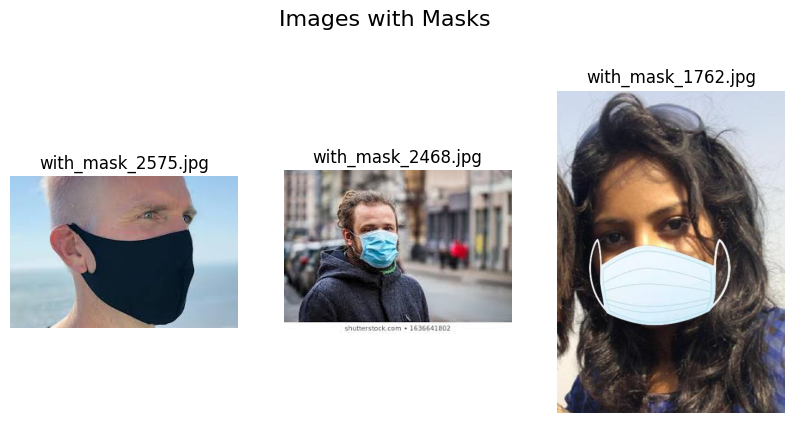

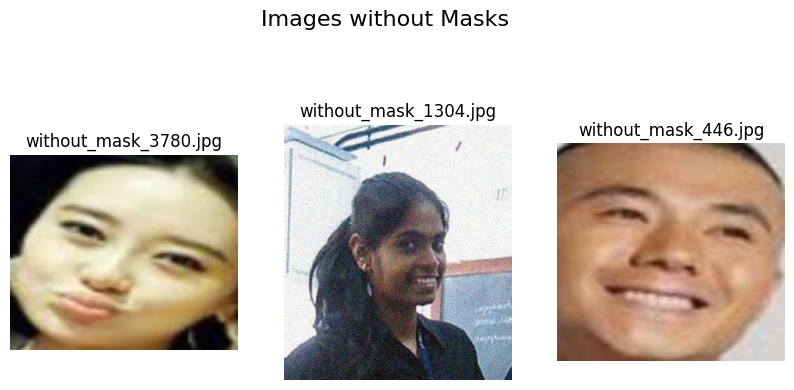

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Define the paths to your image folders
with_mask_dir = "/content/data/with_mask"
without_mask_dir = "/content/data/without_mask"

# Function to display images
def display_images(image_folder, title, num_images=3):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=16)
    image_files = os.listdir(image_folder)[:num_images]  # Select first 3 images

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert from BGR (OpenCV default) to RGB

        plt.subplot(1, num_images, i + 1)  # Adjust subplot for 3 images per row
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
    plt.show()

# Display samples from both categories
display_images(with_mask_dir, "Images with Masks")
display_images(without_mask_dir, "Images without Masks")


# Model 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1= model1.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.6907 - loss: 0.8240 - val_accuracy: 0.9159 - val_loss: 0.2311
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.8959 - loss: 0.2582 - val_accuracy: 0.9106 - val_loss: 0.2381
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.9117 - loss: 0.2192 - val_accuracy: 0.9245 - val_loss: 0.1999
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9346 - loss: 0.1681 - val_accuracy: 0.9238 - val_loss: 0.2230
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.9495 - loss: 0.1228 - val_accuracy: 0.9450 - val_loss: 0.1653
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.9585 - loss: 0.1066 - val_accuracy: 0.9093 - val_loss: 0.2992
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.9685 - loss: 0.0845 - val_accuracy: 0.9364 - val_loss: 0.2031
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.9785 - loss: 0.0627 - 

# Model 2-Using Pretrained Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(150,150,3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step - accuracy: 0.9236 - loss: 0.1760 - val_accuracy: 0.9781 - val_loss: 0.0557
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.9804 - loss: 0.0552 - val_accuracy: 0.9762 - val_loss: 0.0692
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.9882 - loss: 0.0365 - val_accuracy: 0.9861 - val_loss: 0.0400
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.9908 - loss: 0.0255 - val_accuracy: 0.9841 - val_loss: 0.0404
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.9897 - loss: 0.0259 - val_accuracy: 0.9887 - val_loss: 0.0398
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.9941 - loss: 0.0153 - val_accuracy: 0.9854 - val_loss: 0.0396
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9961 - loss: 0.0132 - val_accuracy: 0.9861 - val_loss: 0.0423
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.9956 - loss: 0.0132 -

# Model after Data augumentation

In [ ]:
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = augmented_datagen.flow_from_directory(
    '/content/data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = augmented_datagen.flow_from_directory(
    '/content/data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [ ]:
history_aug = model1.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 271ms/step - accuracy: 0.8804 - loss: 0.3135 - val_accuracy: 0.9152 - val_loss: 0.2191
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 268ms/step - accuracy: 0.8920 - loss: 0.2666 - val_accuracy: 0.9298 - val_loss: 0.2019
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 271ms/step - accuracy: 0.8991 - loss: 0.2419 - val_accuracy: 0.9225 - val_loss: 0.2067
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 53s 279ms/step - accuracy: 0.9047 - loss: 0.2414 - val_accuracy: 0.9199 - val_loss: 0.2028
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 270ms/step - accuracy: 0.9150 - loss: 0.2093 - val_accuracy: 0.9364 - val_loss: 0.1657
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 52s 277ms/step - accuracy: 0.9171 - loss: 0.2106 - val_accuracy: 0.9424 - val_loss: 0.1780
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 270ms/step - accuracy: 0.9204 - loss: 0.2064 - val_accuracy: 0.9510 - val_loss: 0.1465
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 269ms/step - accuracy: 0.9191 - loss: 0

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


NameError: name 'history' is not defined

In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['CNN from Scratch', 'Pretrained', 'MobileNetV2 + Augmentation'],
    'Training Accuracy (%)': [
        history1.history['accuracy'][-1]*100,
        history2.history['accuracy'][-1]*100,
        history_aug.history['accuracy'][-1]*100
    ],
    'Validation Accuracy (%)': [
        history1.history['val_accuracy'][-1]*100,
        history2.history['val_accuracy'][-1]*100,
        history_aug.history['val_accuracy'][-1]*100
    ]
})

print(results_df)


                        Model  Training Accuracy (%)  Validation Accuracy (%)
0            CNN from Scratch              98.278999                93.774837
1                  Pretrained              98.063874                97.748345
2  MobileNetV2 + Augmentation              92.454082                91.258276


As we can observe the basic CNN is giving better accuracy but it has overfitting issue which is resolved using pretrained model


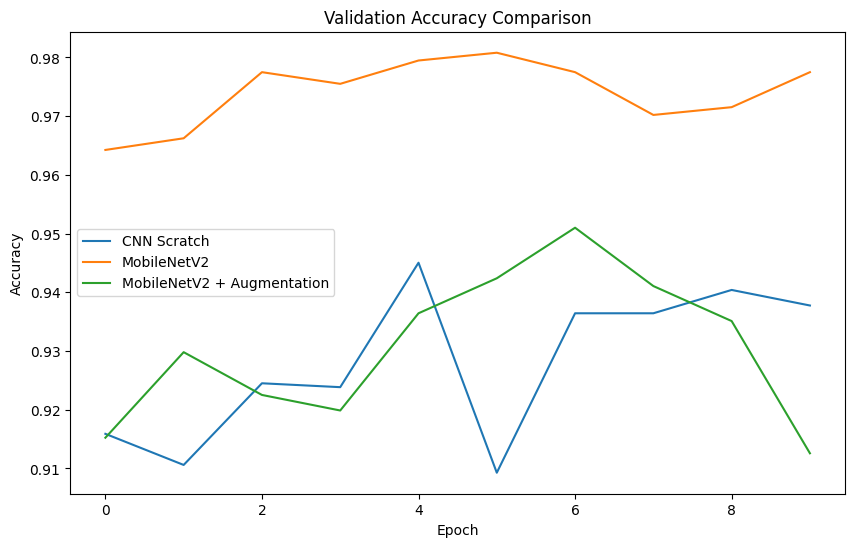

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history1.history['val_accuracy'], label='CNN Scratch')
plt.plot(history2.history['val_accuracy'], label='MobileNetV2')
plt.plot(history_aug.history['val_accuracy'], label='MobileNetV2 + Augmentation')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.9014 - loss: 0.2499
Simple CNN Model - Validation Loss: 0.2347, Validation Accuracy: 0.9106
Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 65s 301ms/step - accuracy: 0.9711 - loss: 0.1028 - val_accuracy: 0.9642 - val_loss: 0.1003
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 258ms/step - accuracy: 0.9728 - loss: 0.0727 - val_accuracy: 0.9662 - val_loss: 0.0982
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 267ms/step - accuracy: 0.9775 - loss: 0.0620 - val_accuracy: 0.9775 - val_loss: 0.0771
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 258ms/step - accuracy: 0.9819 - loss: 0.0553 - val_accuracy: 0.9755 - val_loss: 0.0735
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 263ms/step - accuracy: 0.9757 - loss: 0.0583 - val_accuracy: 0.9795 - val_loss: 0.0843
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 256ms/step - accuracy: 0.9793 - loss: 0.0534 - val_accuracy: 0.9808 - val_loss: 0.0579
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 258ms/step - accuracy: 

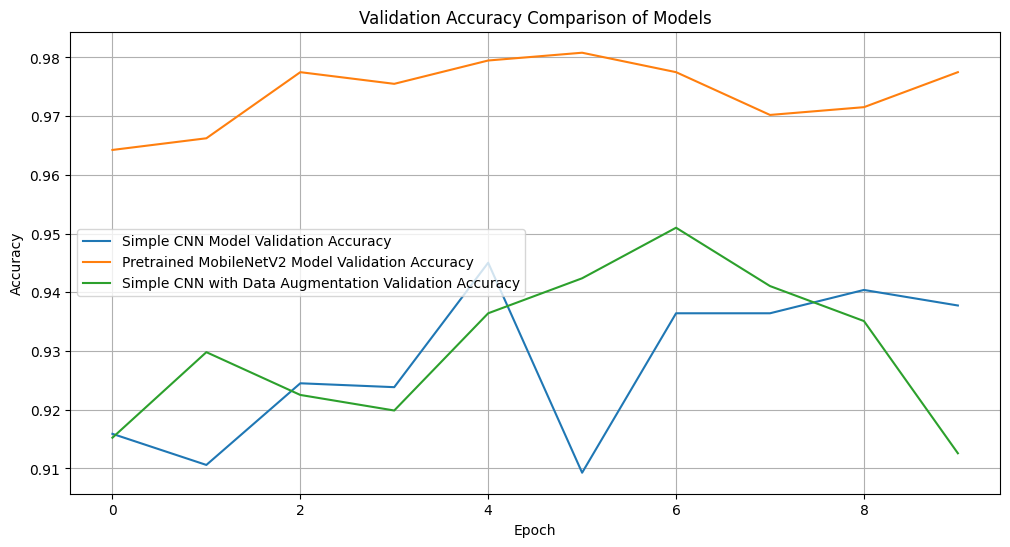

In [ ]:
# Function to evaluate a model and store results
def evaluate_model(model, history, model_name):
    loss, accuracy = model.evaluate(validation_generator)
    print(f'{model_name} - Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')
    return {
        'name': model_name,
        'loss': loss,
        'accuracy': accuracy,
        'history': history
    }

# --- Model 1 Evaluation ---
model1_results = evaluate_model(model1, history1, "Simple CNN Model") # Assuming 'model' is the simple CNN trained first

# --- Model 2 Evaluation ---
# Compile Model 2 before evaluating
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Re-train Model 2 (pretrained MobileNetV2) as it was not trained in the original code snippet
history2 = model2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
model2_results = evaluate_model(model2, history2, "Pretrained MobileNetV2 Model")

# --- Model 3 Evaluation (Model after Data Augmentation) ---
# Assuming 'model' is the simple CNN trained *again* after data augmentation
# Re-train the simple CNN with augmented data
history3 = model1.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
model3_results = evaluate_model(model1, history_aug, "Simple CNN with Data Augmentation")


# --- Compare Models ---
all_results = [model1_results, model2_results, model3_results]

print("\n--- Model Comparison ---")
for result in all_results:
    print(f"{result['name']}: Accuracy = {result['accuracy']:.4f}, Loss = {result['loss']:.4f}")

# Optional: Plot accuracy for all models
plt.figure(figsize=(12, 6))

for result in all_results:
    plt.plot(result['history'].history['val_accuracy'], label=f'{result["name"]} Validation Accuracy')

plt.title('Validation Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()


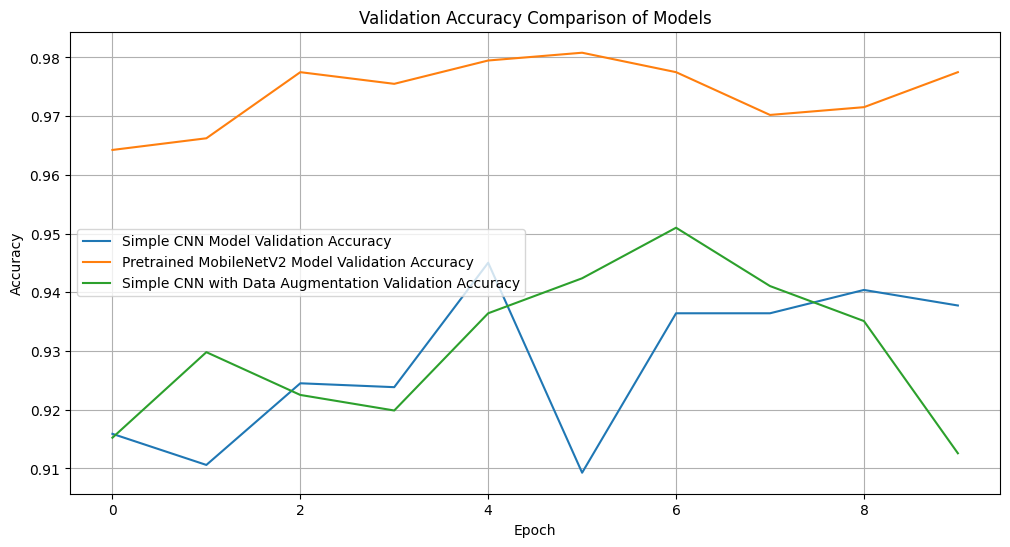

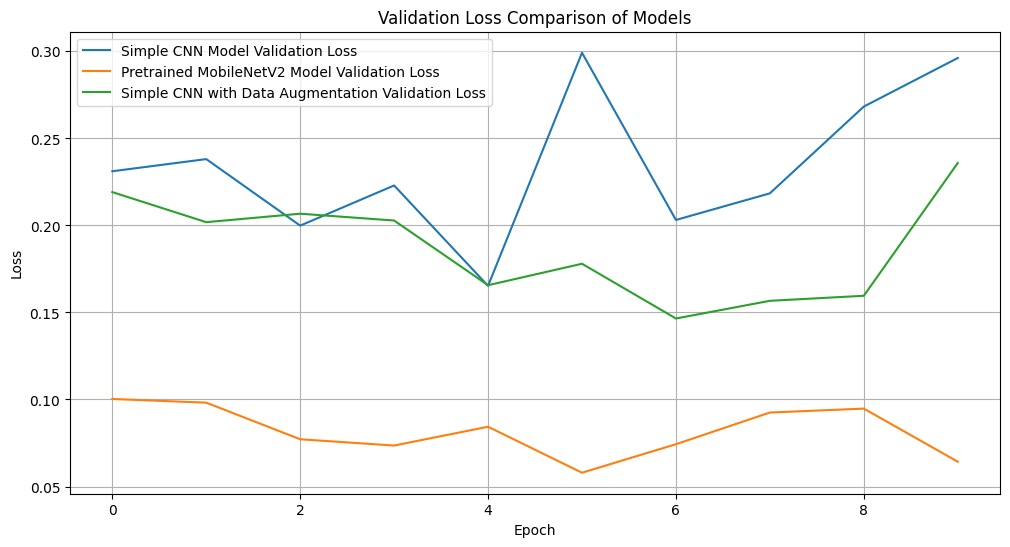

In [ ]:


# Plotting validation accuracy for all models
plt.figure(figsize=(12, 6))

plt.plot(model1_results['history'].history['val_accuracy'], label=f'{model1_results["name"]} Validation Accuracy')
plt.plot(model2_results['history'].history['val_accuracy'], label=f'{model2_results["name"]} Validation Accuracy')
plt.plot(model3_results['history'].history['val_accuracy'], label=f'{model3_results["name"]} Validation Accuracy')

plt.title('Validation Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plotting validation loss for all models (optional, but good practice)
plt.figure(figsize=(12, 6))

plt.plot(model1_results['history'].history['val_loss'], label=f'{model1_results["name"]} Validation Loss')
plt.plot(model2_results['history'].history['val_loss'], label=f'{model2_results["name"]} Validation Loss')
plt.plot(model3_results['history'].history['val_loss'], label=f'{model3_results["name"]} Validation Loss')

plt.title('Validation Loss Comparison of Models')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step


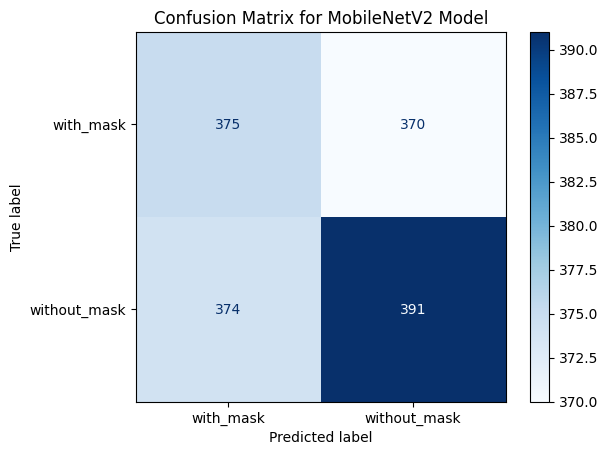

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step


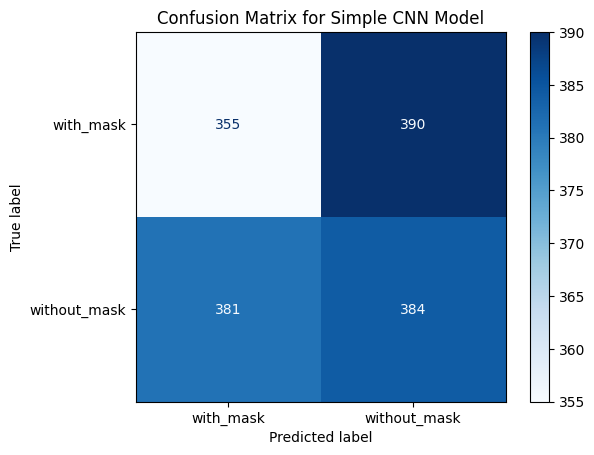

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step


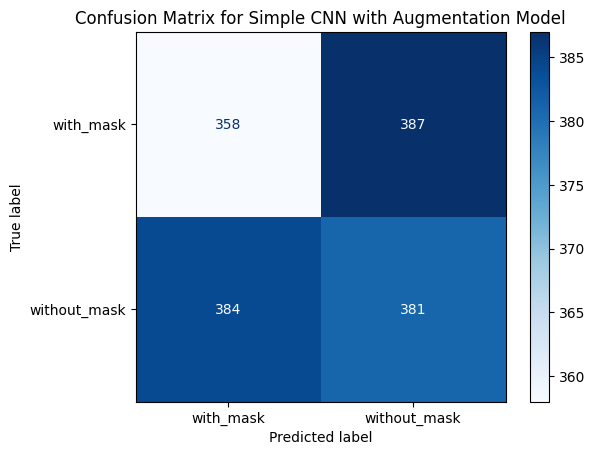

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions for the validation set
validation_generator.reset() # Reset generator before predicting
predictions = model2.predict(validation_generator) # Using model2 (MobileNetV2) for prediction
predicted_classes = np.round(predictions).flatten()

# Get the true labels from the validation generator
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MobileNetV2 Model')
plt.show()

# Repeat for Model 1 (Simple CNN) if desired
validation_generator.reset()
predictions_model1 = model1.predict(validation_generator)
predicted_classes_model1 = np.round(predictions_model1).flatten()

cm_model1 = confusion_matrix(true_classes, predicted_classes_model1)
disp_model1 = ConfusionMatrixDisplay(confusion_matrix=cm_model1, display_labels=class_labels)
disp_model1.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Simple CNN Model')
plt.show()

# Repeat for Augmented Model (Model 1 trained with augmentation) if desired
validation_generator.reset()
predictions_aug = model1.predict(validation_generator) # Assuming model1 is the one trained with augmentation
predicted_classes_aug = np.round(predictions_aug).flatten()

cm_aug = confusion_matrix(true_classes, predicted_classes_aug)
disp_aug = ConfusionMatrixDisplay(confusion_matrix=cm_aug, display_labels=class_labels)
disp_aug.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Simple CNN with Augmentation Model')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.15
)

train_generator = train_datagen.flow_from_directory(
    '/content/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = augmented_datagen.flow_from_directory(
    '/content/data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = augmented_datagen.flow_from_directory(
    '/content/data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

resnet_model = Model(inputs=base_model.input, outputs=predictions)

resnet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_resnet = resnet_model.fit(train_gen, epochs=5, validation_data=val_gen)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


NameError: name 'train_gen' is not defined

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the complete model
model_Res = Model(inputs=base_model.input, outputs=predictions)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


#Compile

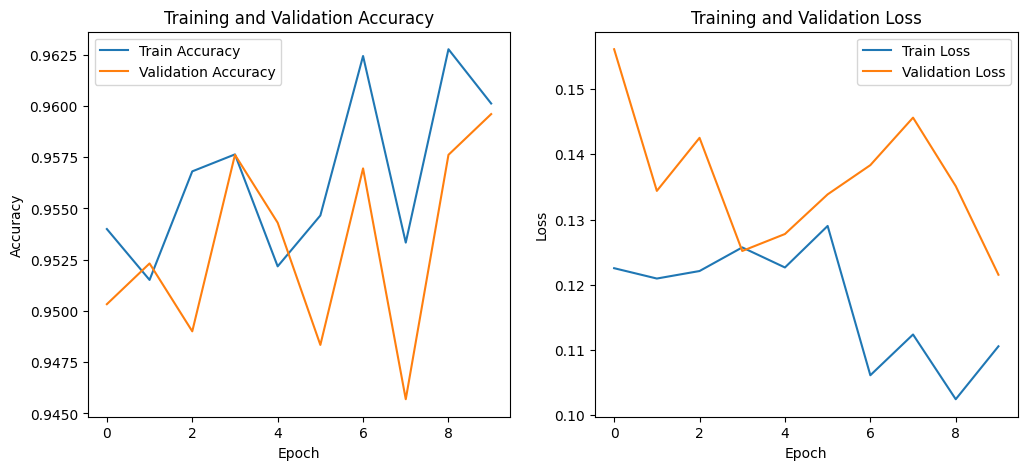

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Unfreeze last few layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Continue training
fine_tune_history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
126/189 ━━━━━━━━━━━━━━━━━━━━ 1:18 1s/step - accuracy: 0.9679 - loss: 0.0850

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


130/189 ━━━━━━━━━━━━━━━━━━━━ 1:12 1s/step - accuracy: 0.9679 - loss: 0.0850

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9684 - loss: 0.0845

KeyboardInterrupt: 